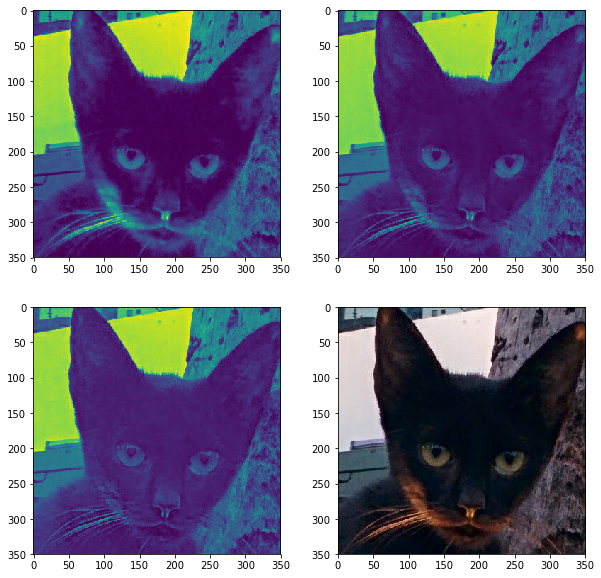

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
im = pltimg.imread('.\\6_26.jpg')
fig = plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(im[250:600,850:1200,0])
plt.subplot(222)
plt.imshow(im[250:600,850:1200,1])
plt.subplot(223)
plt.imshow(im[250:600,850:1200,2])
plt.subplot(224)
plt.imshow(im[250:600,850:1200])
plt.show()

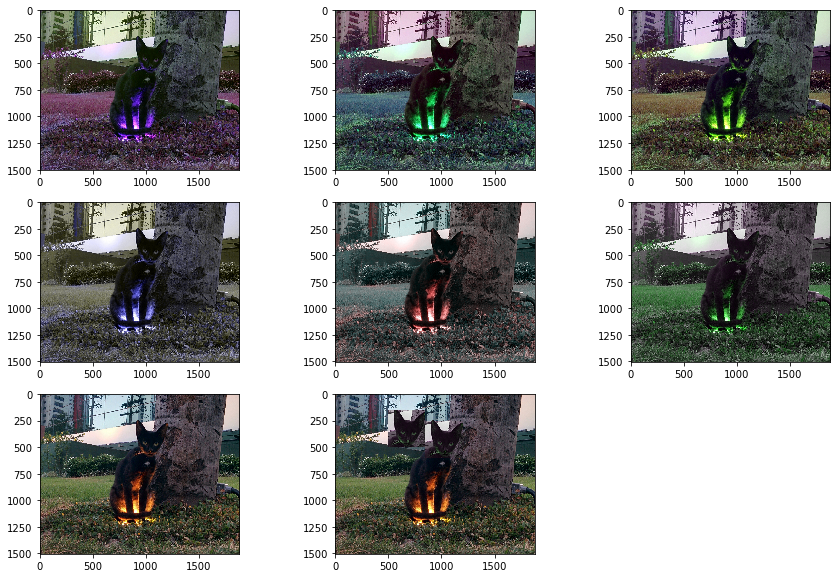

In [62]:
imm = pltimg.imread('.\\6_26.jpg')
figg = plt.figure(figsize=(15,10))
plt.subplot(331)
imm[:,:,0]=im[:,:,1]
imm[:,:,1]=im[:,:,2]
imm[:,:,2]=im[:,:,0]
plt.imshow(imm[:,:])
plt.subplot(332)
imm[:,:,0]=im[:,:,2]
imm[:,:,1]=im[:,:,0]
imm[:,:,2]=im[:,:,1]
head1 = imm[250:600,850:1200]
plt.imshow(imm[:,:])
plt.subplot(333)
imm[:,:,0]=im[:,:,1]
imm[:,:,1]=im[:,:,0]
imm[:,:,2]=im[:,:,2]
plt.imshow(imm[:,:])
plt.subplot(334)
imm[:,:,0]=im[:,:,1]
imm[:,:,1]=im[:,:,1]
head2 = imm[250:600,850:1200]
imm[:,:,2]=im[:,:,0]
plt.imshow(imm[:,:])
plt.subplot(335)
imm[:,:,0]=im[:,:,0]
imm[:,:,1]=im[:,:,1]
imm[:,:,2]=im[:,:,1]
plt.imshow(imm[:,:])
plt.subplot(336)
imm[:,:,0]=im[:,:,2]
imm[:,:,1]=im[:,:,1]
imm[:,:,2]=im[:,:,2]
plt.imshow(imm[:,:])
plt.subplot(337)
plt.imshow(im[:,:])
plt.subplot(338)
im[250:600,850:1200]=head1
im[150:500,500:850]=head2
plt.imshow(im[:,:])
plt.show()

In [ ]:
import numpy as np

# Possible Inputs for XOR operation.
layer1 = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])
#2 classes : 0 and 1
target_output = np.array([[0, 1, 1, 0]]).T

#Random initialisation of weights
np.random.seed(1)
weights_1 = np.random.random((3, 2))
weights_2 = np.random.random((3, 1))
bias = np.ones((1, 4))

def sigmoid(g):
    return 1/(1 + np.exp(-g))

def sigmoid_gradient(g):
    return g*(1 - g)

for iter in range(100000):
    a2 = sigmoid(np.dot(layer1, weights_1))
    if iter % 80000 == 0:
        print("Case: ", iter)
        print(a2)
    a2 = a2.T
    if iter % 80000 == 0:
        print(a2)
    a2 = np.vstack((a2, bias)).T
    if iter % 80000 == 0:
        print(a2.shape)
    a3 = sigmoid(np.dot(a2, weights_2))

    a3_error = target_output - a3
    a2_error = np.dot(a3_error, weights_2[0:2, :].T)*sigmoid(np.dot(layer1, weights_1))

    a3_delta = a3_error*sigmoid_gradient(a3)
    a2_delta = a2_error*sigmoid_gradient(a2[:, 0:2])

    weights_2 += np.dot(a2.T, a3_delta)
    weights_1 += np.dot(layer1.T, a2_delta)


print("After training : ")
print(a3)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

layers = [2,2,1]
weights = []
for i in range(1, len(layers) - 1):
    r = np.random.random((layers[i-1] + 1, layers[i] + 1))
    weights.append(r)
print(weights)
r = np.random.random( (layers[i] + 1, layers[i+1]))
weights.append(r)
print(weights)

ones = np.atleast_2d(np.ones(X.shape[0]))  #(1,4) arr  bias
X = np.concatenate((ones.T, X), axis=1)   #(4,4) arr
i = np.random.randint(X.shape[0])
a = [X]
print("a[0]: ", a[0])
for l in range(len(weights)):
    dot_value = np.dot(a[l], weights[l]) 
    activation = sigmoid(dot_value)
    print(l, activation)
    activation = np.vstack(activation, ones)
    a.append(activation)
    

#print(a)
#print(a[-1])

[array([[ 0.17435455,  0.04482954,  0.56743959],
       [ 0.27855408,  0.28302734,  0.80538277],
       [ 0.19487411,  0.51944346,  0.49987484]])]
[array([[ 0.17435455,  0.04482954,  0.56743959],
       [ 0.27855408,  0.28302734,  0.80538277],
       [ 0.19487411,  0.51944346,  0.49987484]]), array([[ 0.7732952 ],
       [ 0.03907053],
       [ 0.27953315]])]
a[0]:  [[ 1.  0.  0.]
 [ 1.  0.  1.]
 [ 1.  1.  0.]
 [ 1.  1.  1.]]
0 [[ 0.54347855  0.51120551  0.63817216]
 [ 0.59127258  0.63744065  0.74408586]
 [ 0.61133056  0.58123783  0.79783576]
 [ 0.65651063  0.70000052  0.86677006]]
1 [[ 0.64990751]
 [ 0.66599586]
 [ 0.67226997]
 [ 0.68510155]]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

scores = np.array([3.0, 1.0, 0.2])
print(softmax(scores * 10))

[  9.99999998e-01   2.06115362e-09   6.91440009e-13]
